In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('data.csv')
df_data.head(3)

C:\Users\ADMIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases


#### Cleaning the data

In [3]:
df_data.isnull().sum()

report_date              7
location                 7
location_type            7
data_field               7
data_field_code          7
time_period         107619
time_period_type    107619
value                  138
unit                     7
dtype: int64

In [4]:
df_data.shape

(107619, 9)

All the data in the columns 'time_period' and 'time_period_type' is NaN. So we can drop them

In [5]:
# dropping columns
df_data.drop(['time_period', 'time_period_type'], axis=1, inplace=True)
df_data.head(3)

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases


In [6]:
df_data.isna().sum()

report_date          7
location             7
location_type        7
data_field           7
data_field_code      7
value              138
unit                 7
dtype: int64

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107612 non-null object
location           107612 non-null object
location_type      107612 non-null object
data_field         107612 non-null object
data_field_code    107612 non-null object
value              107481 non-null object
unit               107612 non-null object
dtypes: object(7)
memory usage: 5.7+ MB


In [8]:
#converting column 'value' data into number from string
df_data["value"]=pd.to_numeric(df_data["value"],errors="coerce")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107612 non-null object
location           107612 non-null object
location_type      107612 non-null object
data_field         107612 non-null object
data_field_code    107612 non-null object
value              107478 non-null float64
unit               107612 non-null object
dtypes: float64(1), object(6)
memory usage: 5.7+ MB


In [9]:
# setting mean values to value column and deleting the rest nan data from the data
df_data["value"].fillna(df_data["value"].mean(),inplace=True)
df_data.isna().sum()

report_date        7
location           7
location_type      7
data_field         7
data_field_code    7
value              0
unit               7
dtype: int64

In [10]:
df_data.head(2)

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases


In [11]:
#In columns except value, mean cant be taken, so we'll remove the rows containing nan values
df_data.dropna(inplace=True)

In [12]:
df_data.shape

(107612, 7)

In [13]:
df_data.isnull().sum()

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              0
unit               0
dtype: int64

#### Q1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [14]:
df_data[(df_data['location']=='Argentina-Buenos_Aires') & (df_data['data_field_code']=='AR0005')]['value']

4       127.0
148     145.0
292     173.0
436     178.0
580     183.0
724     188.0
868     339.0
1012    203.0
1156    351.0
1300    215.0
1444    216.0
1588    220.0
1732    220.0
1876    223.0
Name: value, dtype: float64

#### Q2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.
#### HINT : Plot sum of the 'value' where 'units' = 'cases' to identify the difference for the locations 'Argentina-CABA' and 'Argentina-Catamarca' for entire duration

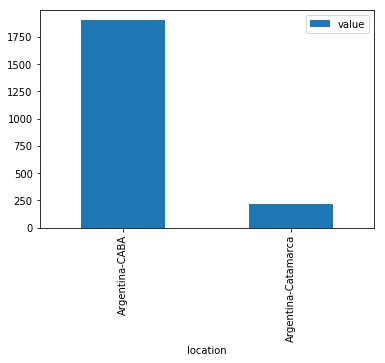

In [15]:
data_caba_cata = df_data[(df_data['location']=='Argentina-CABA') | (df_data['location']=='Argentina-Catamarca')]
data_caba_cata.groupby('location').sum().plot(kind='bar')

In [16]:
# Answer type 2
data1 = df_data[df_data['location']=='Argentina-CABA']
data2 = df_data[df_data['location']=='Argentina-Catamarca']

In [17]:
df_data['unit'].unique()

array(['cases', 'municipalities'], dtype=object)

In [18]:
data1['unit'].unique()

array(['cases'], dtype=object)

In [19]:
data2['unit'].unique()

array(['cases'], dtype=object)

data1 and data2 have only one unit='cases', need not to consider in the plot

In [20]:
data1_caba = data1[['report_date', 'value']]
data1_caba.head(3)

,report_date,value
6,2016-03-19,0.0
7,2016-03-19,0.0
8,2016-03-19,9.0


In [21]:
data2_cata = data2[['report_date','value']]
data2_cata.head(3)

,report_date,value
12,2016-03-19,0.0
13,2016-03-19,0.0
14,2016-03-19,0.0


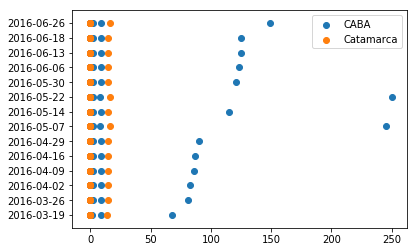

In [22]:
plt.scatter(y=data1_caba['report_date'], x=data1_caba['value'],label="CABA")
plt.scatter(y=data2_cata['report_date'], x=data2_cata['value'],label="Catamarca")
plt.legend(loc=0)

#### Q3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [23]:
df_data.head(2)

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases


In [24]:
df_data['data_field'].nunique()

148

In [25]:
data3 = df_data[df_data['location']=='Argentina-Buenos_Aires']
data3.head(3)

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

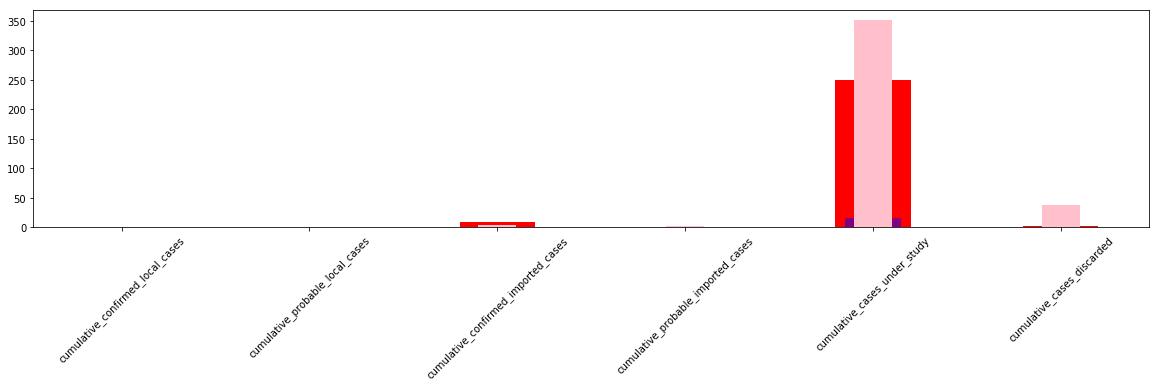

In [26]:
plt.figure(figsize=(20,4))
plt.bar(data1['data_field'], data1['value'],width=-0.4, color='red')   #caba
plt.bar(data2['data_field'], data2['value'],width=-0.3, color='purple')   #cata
plt.bar(data3['data_field'], data3['value'],width=0.2, color='pink')    #Aires
plt.xticks(rotation=45)


#### Q4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good
#### Hint : identify most common mistakes that can occur during typing and use big text corpus(big.txt)

In [27]:
#function for removing punctuation marks
#def remove_punctuation(string1):
 #   punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 #   for x in string1.lower(): 
  #      if x in punctuations: 
   #         string1 = string1.replace(x, "")
    #return string1

In [28]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [29]:
#function for removing punctuation marks from the brgining and the end
#perfecto
def remove_punctuation_from_last(string1):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    while string1!='' and string1[-1] in punctuations:
        string1 = string1[0:-1]
        #print(string1)
    while string1!='' and string1[0] in punctuations:
        string1 = string1[1:]
    return string1

In [30]:
#def check_accuracy(word1, my_word, length):
#    count=0
#    for i in range(0, length):
#        if word1[i] == my_word[i]:
#            count+=1
#    return count

In [31]:
#def find_accurate_word(string1):
#    word_length = len(string1)
#    max_acc=0
#    for i in word_list:
#        if len(i)==word_length:
#            count = check_accuracy(i, string1, word_length)
#            if max_acc<count:
#                max_acc=count
#                word = i
#    #word = string1
#    return word'''

In [32]:
# function 2
def find_accurate_word(string1):
    my_word_length = len(string1)
    max_acc=0
    max_occ =0
    for i in word_data.index:
        count = similar(string1, word_data['Word'][i])
        if ((len(word_data['Word'][i])==my_word_length) and (max_acc<count)):
            max_acc=count
            max_occ=word_data['Occurence'][i]
            word = word_data['Word'][i]
    #print(max_acc)
    if max_acc>= (my_word_length-1)/my_word_length:
        return word

In [33]:
with open('big.txt', 'r') as big_txt_file:
    contents = big_txt_file.read()
    
word_list = contents.split()
for word in range(len(word_list)):
    word_list[word] = word_list[word].lower()
    word_list[word] = remove_punctuation_from_last(word_list[word])
    #print(word)
#word_list = set(word_list)
word_data = pd.DataFrame(word_list)
word_data.head(3)

,0
0,the
1,project
2,gutenberg


In [34]:
word_data = pd.DataFrame(word_data[0].value_counts())
word_data.reset_index(inplace=True)
word_data.head(3)

,index,0
0,the,79019
1,of,39996
2,and,38093


In [35]:
word_data.columns = ['Word', 'Occurence']
word_data.head(3)

,Word,Occurence
0,the,79019
1,of,39996
2,and,38093


In [42]:
input_word = input()
input_word = input_word.lower()
# prints if the word entered by us exisists in the big.txt
word_data[word_data["Word"]==input_word].count()
print('Word present in the big.txt: ', word_data[word_data["Word"]==input_word]['Occurence'].count()==1)

helu
Word present in the big.txt:  False


In [43]:
if word_data[word_data["Word"]==input_word]['Occurence'].count()==0:
    predicted_word = find_accurate_word(input_word)
    if predicted_word == None:
        string_input = input_word + 'x'
        predicted_word = find_accurate_word(string_input)
    print(predicted_word)
else:
    print(input_word)

held
